## [89. Gray Code](https://leetcode.com/problems/gray-code/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

`gray code`是一个二进制的数字系统, 其中两个连续的值只有一位不一样.

给定一个非负的整数`n`标识编码中的总位数, 打印出`gray code`的序列. `gray code`序列必须从`0`开始.

**示例1**
```
Input: 2
Output: [0,1,3,2]
Explanation:
00 - 0
01 - 1
11 - 3
10 - 2

对于一个给定的 n, gray code 序列可能并不是唯一的.
例如, [0,2,3,1] 也是一个有效的gray code序列.

00 - 0
10 - 2
11 - 3
01 - 1
```

**示例2**
```
Input: 0
Output: [0]
解释: 我们将 gray code 序列定义为从0开始. 一个n的gray code 序列长度为2^n, 那么对于 n = 0, 其大小为 2^0 = 1.因此, 对于 n = 0, gray code序列为: [0].
```

### 解题思路

从示例中, 我们可以知道: 对于`n`应该要有`2^n`个元素. 找找规律:


参考[维基百科](https://zh.wikipedia.org/wiki/%E6%A0%BC%E9%9B%B7%E7%A0%81)中得到以下几种方法:

**直接排列法**:

> 以二进制为0值的格雷码为第零项，第一项改变最右边的位元，第二项改变右起第一个为1的位元的左边位元，第三、四项方法同第一、二项，如此反复，即可排列出n个位元的格雷码。

尝试理解一下:
当`n=3`时, `gray code`序列为:
```
000 - 0 
001 - 1
011 - 3 
010 - 2
110 - 6
111 - 7
101 - 5
100 - 4
```

**镜面对称法**

> n位元的格雷码可以从n-1位元的格雷码以上下镜射后加上新位元的方式快速得到，如下图所示:
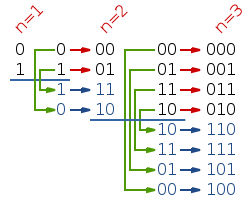

In [21]:
class Solution(object):
    # gray to binary
    def grayCode(self, n):
        """
        :type n: int
        :rtype: List[int]
        """
        if n == 0:
            return [0]
        ans = list()
        total_iter = 1
        for i in range(n-1):
            total_iter *= 2 
        iter = 0
        code_arr = [0 for _ in range(n)]
        while iter < total_iter:
            ans.append(self.convert(code_arr))
            code_arr[-1] = 1 - code_arr[-1]
            ans.append(self.convert(code_arr))
            end = n - 1
            while end > 0 and code_arr[end] == 0:
                end -= 1
            if end >= 1:
                code_arr[end-1] = 1 - code_arr[end-1]
            iter += 1
        return ans
        
    def convert(self, arr):
        num = 0
        now_num = 1
        for i in range(len(arr)-1 , -1, -1):
            num += arr[i] * now_num
            now_num *= 2
        return num
    
    def grayCodeMirror(self, n):
        """
        :type n: int
        :rtype: List[int]
        """
        if n == 0:
            return [0]
        if n == 1:
            return [0, 1]
        arr = self.grayCodeMirror(n-1)
        ans = [0 for i in range(2*len(arr))]
        pow_val = 1
        for _ in range(n-1):
            pow_val *= 2
        for i in range(len(arr)):
            ans[i] = arr[i]
            ans[len(arr) + i] = arr[len(arr)-i-1] + pow_val
        return ans

In [22]:
n = 2
s = Solution()
print s.grayCodeMirror(n)

[0, 1, 3, 2]
